# 感知机学习算法的原始形式
#输入：训练数据集T={(x1,y1),(x2,y2),....,(xn,yn)}；学习率alpha(0<alpha<=1)
#输出：w,b;感知机模型f(x)=sign(w*x+b)
#(1)选取初值w0,b0
#(2)在训练集中选取数据(xi,yi)
#(3)如果yi(w*xi+b)<=0
#     w=w+alpha*yi*xi
#     b=b+alpha*yi
#(4)转至(2)，直至训练集中没有误分类点




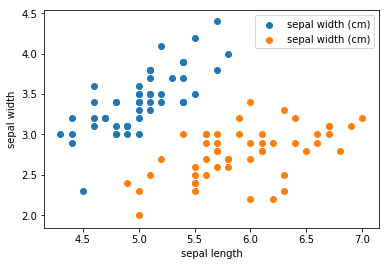

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import  matplotlib.pyplot as plt
from random import shuffle
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target
df.columns



plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'])
plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()


In [67]:

data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [68]:
class perceptronNormalModel:
    def __init__(self):
        self.w=np.zeros((X.shape[1],1))
        self.b=0
        self.learning_rate=0.1
    
    def fit(self,Xtrain,ytrain):
        wrong=True
        while wrong:
            randomRange=[i for i in range(Xtrain.shape[0])]
            shuffle(randomRange)
            wrong_count=0
            for j in randomRange:
                x=Xtrain[j].reshape(1,-1)
                if (ytrain[j]*(x.dot(self.w)+self.b))<=0:
                    wrong_count+=1
            
                    self.w=self.w+self.learning_rate*ytrain[j]*(x.T)
                    self.b=self.b+self.learning_rate*ytrain[j]
            if wrong_count==0:
                wrong=False  
        print("fit complete!")
   

    def drawFitModel(self,data):
        x_points = np.linspace(4, 7,10)
        y_ = -(self.w[0]*x_points + self.b)/self.w[1]
        plt.plot(x_points, y_)

        plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
        plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')
        plt.legend()
        plt.show()

[[ 6.63]
 [-8.38]]
-10.599999999999978
fit complete!


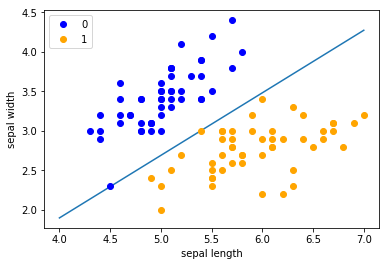

In [69]:
model1=perceptronNormalModel()
model1.fit(X,y)
model1.drawFitModel(data)

# 感知机学习算法的对偶形式
#输入：训练数据集T={(x1,y1),(x2,y2),....,(xn,yn)}；学习率alpha(0<alpha<=1)
#输出：a,b;感知机模型f(x)=sign(sum(aj*yj*xj)*x+b)  
#其中a=(a1,a2,...,an)
#(1)a=0,b=0
#(2)在训练集中选取数据(xi,yi)
#(3)如果yi(sum(aj*yj*xj)*xi+b)<=0
#     ai=ai+alpha
#     b=b+alpha*yi
#(4)转至(2)，直至训练集中没有误分类点

In [82]:
class perceptronDualModel:
    def __init__(self):
        self.a=np.zeros((X.shape[0],1))
        self.b=0
        self.learning_rate=0.1
    
    def fit(self,Xtrain,ytrain):
        ytrain=np.mat(ytrain)
        wrong=True
        while wrong:
            wrong_count=0
            randomRange=[i for i in range(Xtrain.shape[0])]        
            shuffle(randomRange)
            for j in randomRange:
                c=np.multiply(self.a,ytrain.T)
                c=np.hstack((c,c))
                if ytrain[0,j]*(np.sum(np.multiply(c,Xtrain),axis=0).dot(Xtrain[j].T)+self.b)<=0:
                    wrong_count+=1
                    self.a[j]=self.a[j]+self.learning_rate
                    self.b=self.b+self.learning_rate*ytrain[0,j]
            if wrong_count==0:
                wrong=False
                
        print("fit complete!")
    
    def drawFitModel(self,data,Xtrain,ytrain):
        x_points = np.linspace(4, 7,10)
        ytrain=np.mat(ytrain)
        c=np.multiply(self.a,ytrain.T)
        c=np.hstack((c,c))
        w=np.sum(np.multiply(c,Xtrain),axis=0)
        y_ = -(w[0,0]*x_points + self.b)/w[0,1]
        plt.plot(x_points, y_)
        plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
        plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')
        plt.legend()
        plt.show()

            

fit complete!


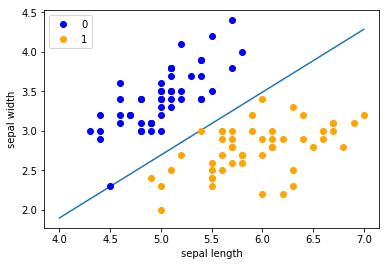

In [83]:
model2=perceptronDualModel()
model2.fit(X,y)
model2.drawFitModel(data,X,y)